In [12]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

In [13]:
!pip install tensorflow

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

import pandas as pd
import numpy as np
import csv

data = pd.read_csv('/content/drive/MyDrive/Deep_Learning_2022/reviews.csv') #,encoding = "ISO-8859-1"
data = data[:34000]
data['overall'] = data['overall'].astype(int)
data.describe()

user_ids = data['reviewerId']
reviews = data['reviewText']
ratings = data['overall']
print(reviews[1000])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
I bought two of these, one for me and one for my girlfriend.  She likes going out without a purse or wallet, but would like to hold her ID and credit card on her, and she does manage to fit both cards in this case, but it is a very tight fit.I use my case to hold my ID card for work.  It is an RFID card that we use to badge in and out of the building.  I always have my phone on me and therefore, always have my work badge on me as well.  The case is very low profile and holds up pretty well.  It doesn't offer a ton of front or top/bottom protection, but if you're looking for a case to take out to the bar, or something to hold a credit card/id, this works great!


In [14]:
print(ratings[1000])

4


In [15]:
#print(ratings[100000])

In [16]:
data.describe()

,overall
count,34000.000000
mean,3.979176
std,1.322487
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
data = data.dropna()

In [18]:
data.isnull().mean()

reviewerId    0.0
reviewText    0.0
overall       0.0
dtype: float64

In [19]:
data.describe()

,overall
count,33980.000000
mean,3.979046
std,1.322496
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
data['overall'].unique()

array([4, 5, 3, 1, 2])

In [21]:
data['overall'].value_counts(normalize=True)

5    0.515274
4    0.204356
3    0.117599
1    0.093084
2    0.069688
Name: overall, dtype: float64

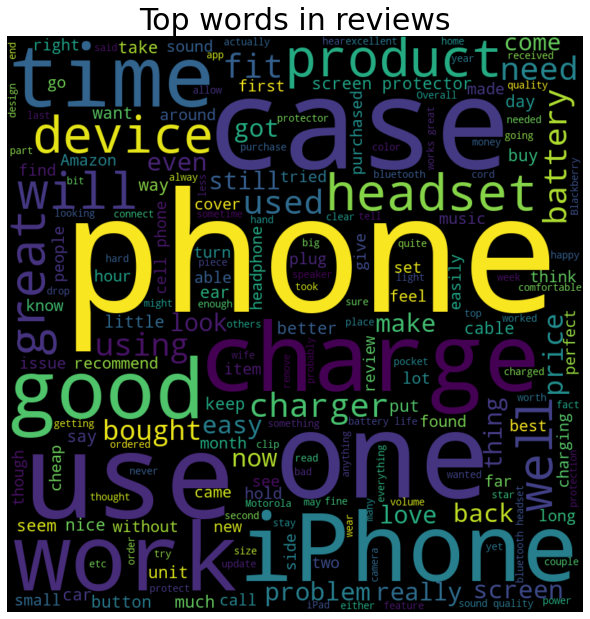

In [22]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(data['reviewText'], title="Top words in reviews")

In [23]:
X = data['reviewText'].copy()
y = data['overall'].copy()

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [26]:
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])
stop = stopwords.words('english')
def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']
X_cleaned = cleanData(X)
X_cleaned.head()

0    look good stick good like rounded shape always...
1    sticker work like review say stick great stay ...
2    awesome make phone look stylish use one far al...
3    item arrive great time perfect condition howev...
4    awesome stay look great use multiple apple pro...
Name: clean_reviews, dtype: object

In [27]:
print(data['reviewText'][2])

These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!


In [28]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
labels = ['1', '2', '3', '4', '5']
           
y = data['overall'].copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, stratify=y, random_state=42,test_size=0.1)
#validation split will done when fitting the model

In [ ]:
print(y[:,0].size)

for i in range(33980):
  print(y[i])


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_length = max([len(x) for x in X_train])
vocab_size = len(tokenizer.word_index)+1 #add 1 to account for unknown word
print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))
X_train = pad_sequences(X_train, max_length ,padding='post')

Vocabulary size: 24239
Max length of sentence: 2116


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.layers import Bidirectional,Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
embedding_vector_length=32
num_classes = 5
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(250,return_sequences=True)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../model/model.h5', save_best_only=True, 
                             save_weights_only=False)]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2116, 32)          775648    
                                                                 
 bidirectional (Bidirectiona  (None, 2116, 500)        566000    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 2116, 500)         0         
                                                                 
 flatten (Flatten)           (None, 1058000)           0         
                                                                 
 dense (Dense)               (None, 128)               135424128 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [32]:
history = model.fit(X_train, y_train, validation_split=0.11, 
                    epochs=15, batch_size=32, verbose=1,
                    callbacks=callbacks)

Epoch 1/15
851/851 [==============================] - 235s 268ms/step - loss: 1.2499 - accuracy: 0.5161 - val_loss: 1.1226 - val_accuracy: 0.5489
Epoch 2/15
851/851 [==============================] - 227s 267ms/step - loss: 1.0849 - accuracy: 0.5560 - val_loss: 1.0753 - val_accuracy: 0.5741
Epoch 3/15
851/851 [==============================] - 220s 259ms/step - loss: 1.0285 - accuracy: 0.5731 - val_loss: 1.0844 - val_accuracy: 0.5608
Epoch 4/15
851/851 [==============================] - 220s 259ms/step - loss: 0.9658 - accuracy: 0.5983 - val_loss: 1.0972 - val_accuracy: 0.5438
Epoch 5/15
851/851 [==============================] - 224s 264ms/step - loss: 0.9013 - accuracy: 0.6335 - val_loss: 1.0943 - val_accuracy: 0.5602
Epoch 6/15
851/851 [==============================] - 221s 260ms/step - loss: 0.8404 - accuracy: 0.6627 - val_loss: 1.1250 - val_accuracy: 0.5813
Epoch 7/15
851/851 [==============================] - 220s 258ms/step - loss: 0.7902 - accuracy: 0.6822 - val_loss: 1.1010 -

Text(0.5, 1.0, 'Training and Validation accuracy')

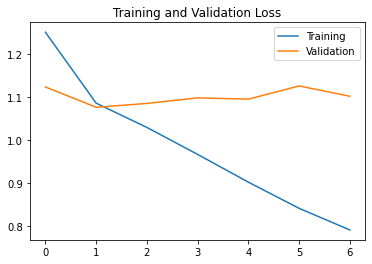

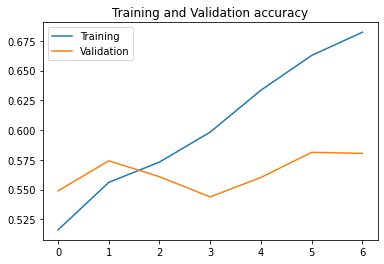

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [51]:
X_test_token = tokenizer.texts_to_sequences(X_test)
X_test_token = pad_sequences(X_test_token, max_length ,padding='post')
#pred = model.predict(X_test_token)
y_test_arg=np.argmax(y_test,axis=1)
pred = np.argmax(model.predict(X_test_token),axis=1)
pred = to_categorical(pred,5)


107/107 [==============================] - 9s 88ms/step


In [41]:
print(pred[3090])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [37]:
print(X_test_token[0])

[139   4  11 ...   0   0   0]


In [52]:
from sklearn.metrics import classification_report,accuracy_score
print('Test Accuracy: {}'.format(accuracy_score(pred, y_test)))
print(classification_report(y_test, pred, target_names=labels))

Test Accuracy: 0.5700412007062978
              precision    recall  f1-score   support

           1       0.56      0.53      0.55       316
           2       0.17      0.02      0.03       237
           3       0.27      0.26      0.26       400
           4       0.34      0.34      0.34       694
           5       0.71      0.81      0.76      1751

   micro avg       0.57      0.57      0.57      3398
   macro avg       0.41      0.39      0.39      3398
weighted avg       0.53      0.57      0.55      3398
 samples avg       0.57      0.57      0.57      3398

